In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

### Problema 1

In [43]:
def binarizacion(imagen):
    imagen_gris = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)
    
    _, imagen_binaria_global = cv2.threshold(imagen_gris, 128, 255, cv2.THRESH_BINARY)
    
    plt.figure(figsize=(10, 8))
    
    plt.subplot(1, 2, 1)
    plt.imshow(imagen_gris, cmap='gray')
    plt.title('Imagen Original')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(imagen_binaria_global, cmap='gray')
    plt.title('Binarización Global')
    plt.axis('off')

    plt.show()




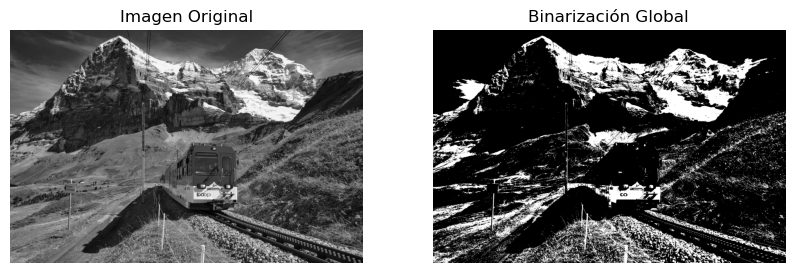

In [55]:
imagen = 'imagen_para_binarizar.jpg'
binarizacion(imagen)

### Problema 2

In [91]:
def procesar_imagenes(imagen1_op, imagen2_op, umbral=127):

    imagen1 = cv2.imread(imagen1_op)
    imagen2 = cv2.imread(imagen2_op)
        
    if imagen1.shape != imagen2.shape:
        raise ValueError("Las imágenes deben tener el mismo tamaño.")
    
    imagen1_rgb = cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB)
    imagen2_rgb = cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB)
    
    imagen1_gris = cv2.cvtColor(imagen1_rgb, cv2.COLOR_RGB2GRAY)
    imagen2_gris = cv2.cvtColor(imagen2_rgb, cv2.COLOR_RGB2GRAY)
    
    _, imagen1_binaria = cv2.threshold(imagen1_gris, umbral, 255, cv2.THRESH_BINARY)
    _, imagen2_binaria = cv2.threshold(imagen2_gris, umbral, 255, cv2.THRESH_BINARY)
    
    suma = cv2.add(imagen1_binaria, imagen2_binaria)
    resta = cv2.subtract(imagen1_binaria, imagen2_binaria)
    and_op = cv2.bitwise_and(imagen1_binaria, imagen2_binaria)
    or_op = cv2.bitwise_or(imagen1_binaria, imagen2_binaria)
    xor_op = cv2.bitwise_xor(imagen1_binaria, imagen2_binaria)
    
    resultados = {
        "Suma": suma,
        "Resta": resta,
        "AND": and_op,
        "OR": or_op,
        "XOR": xor_op
    }
    
    return resultados

def mostrar_resultados(imagen1_rgb, imagen2_rgb, resultados):
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 4, 1)
    plt.imshow(imagen1_rgb, cmap='gray')
    plt.title('Imagen 1')
    plt.axis('off')
    
    plt.subplot(2, 4, 2)
    plt.imshow(imagen2_rgb, cmap='gray')
    plt.title('Imagen 2')
    plt.axis('off')
    
    plt.subplot(2, 4, 3)
    plt.imshow(resultados["Suma"], cmap='gray')
    plt.title('Suma')
    plt.axis('off')
    
    plt.subplot(2, 4, 4)
    plt.imshow(resultados["Resta"], cmap='gray')
    plt.title('Resta')
    plt.axis('off')
    
    plt.subplot(2, 4, 5)
    plt.imshow(resultados["AND"], cmap='gray')
    plt.title('AND')
    plt.axis('off')
    
    plt.subplot(2, 4, 6)
    plt.imshow(resultados["OR"], cmap='gray')
    plt.title('OR')
    plt.axis('off')
    
    plt.subplot(2, 4, 7)
    plt.imshow(resultados["XOR"], cmap='gray')
    plt.title('XOR')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


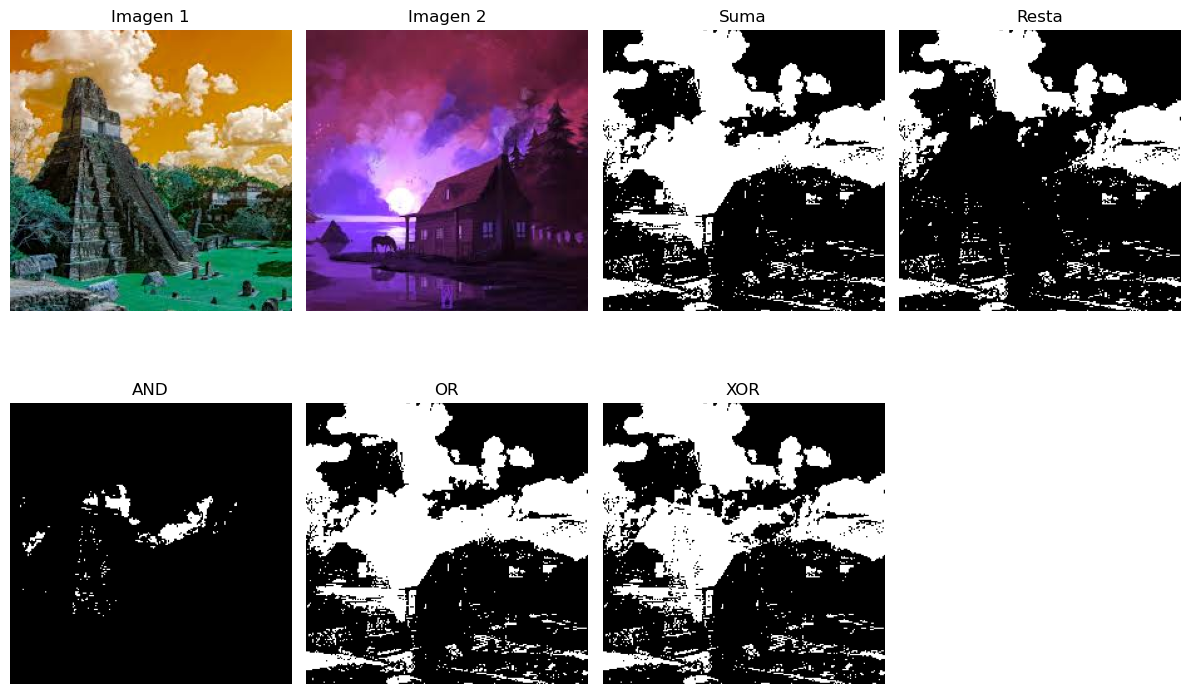

In [92]:
imagen1_path = 'imagen1_op.jpg'
imagen2_path = 'imagen2_op.jpg'

imagen1 = cv2.imread(imagen1_path)

imagen2 = cv2.imread(imagen2_path)

resultados = procesar_imagenes(imagen1_path, imagen2_path)

mostrar_resultados(imagen1, imagen2, resultados)

### Problema 3

In [2]:
def mostrar_imagen_3d(imagen_path):

    imagen_gris = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)
    
    x = np.arange(0, imagen_gris.shape[1])
    y = np.arange(0, imagen_gris.shape[0])
    x, y = np.meshgrid(x, y)
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot_surface(x, y, imagen_gris, cmap='gray', edgecolor='none')
    
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Intensidad de Gris')
    ax.set_title('Representación 3D de la Imagen en Escala de Grises')
    
    plt.show()



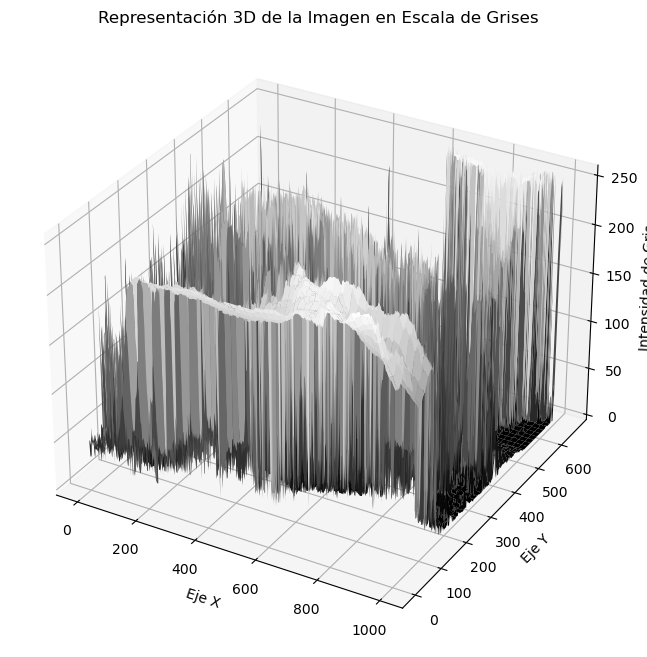

In [5]:
imagen_ruta = 'imagen_prueba.jpg'
mostrar_imagen_3d(imagen_ruta)

### Problema 4

Negativa

In [13]:
def transformar_negativa(imagen_gris):

    return 255 - imagen_gris


Lineal

In [14]:
def transformar_lineal(imagen_gris, a=1, b=0):

    imagen_transformada = a * imagen_gris + b
    return np.clip(imagen_transformada, 0, 255).astype(np.uint8)


Logaritmica

In [15]:
def transformar_logaritmica(imagen_gris, c=1):

    imagen_transformada = c * np.log1p(imagen_gris)
    return np.clip(imagen_transformada * 255 / np.log1p(255), 0, 255).astype(np.uint8)


Exponencial

In [16]:
def transformar_exponencial(imagen_gris, c=1, gamma=1):

    imagen_transformada = c * np.power(imagen_gris / 255.0, gamma)
    return np.clip(imagen_transformada * 255, 0, 255).astype(np.uint8)


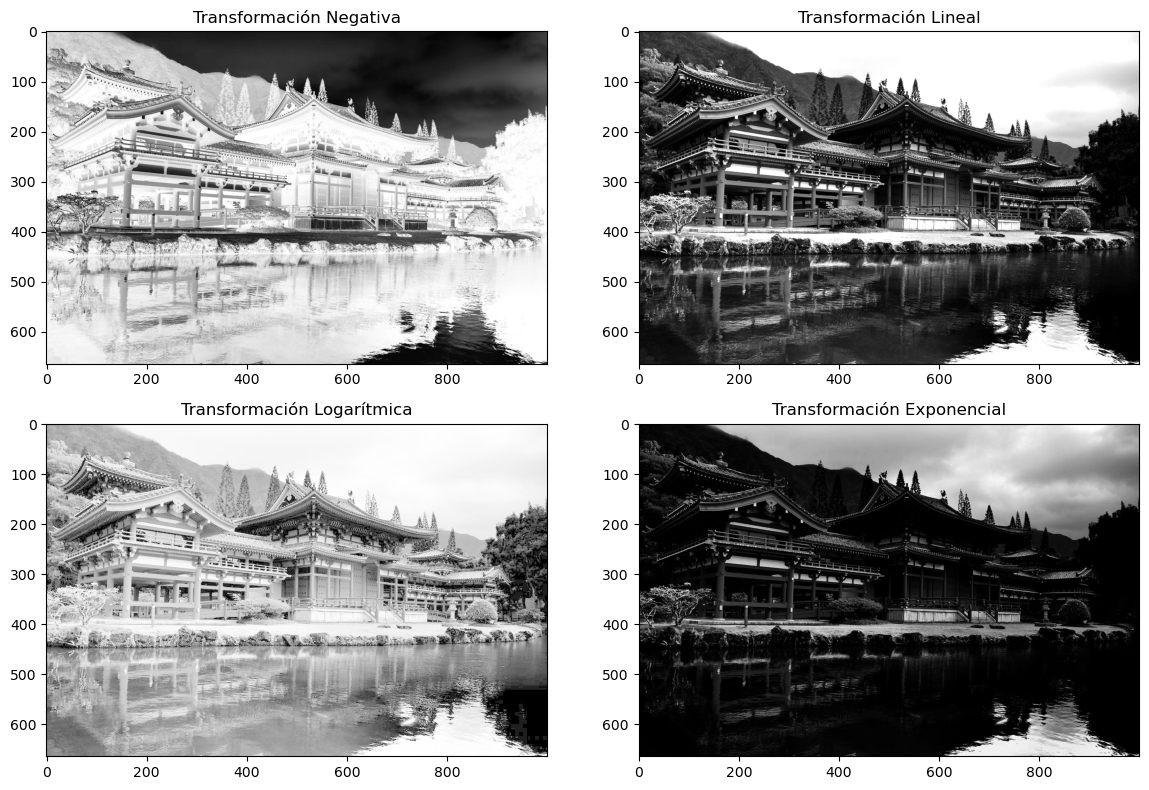

In [17]:
imagen_gris = cv2.imread('imagen_prueba.jpg', cv2.IMREAD_GRAYSCALE)

imagen_negativa = transformar_negativa(imagen_gris)
imagen_lineal = transformar_lineal(imagen_gris, a=1.2, b=10)
imagen_logaritmica = transformar_logaritmica(imagen_gris, c=1)
imagen_exponencial = transformar_exponencial(imagen_gris, c=1, gamma=2)


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(imagen_negativa, cmap='gray')
plt.title('Transformación Negativa')

plt.subplot(2, 2, 2)
plt.imshow(imagen_lineal, cmap='gray')
plt.title('Transformación Lineal')

plt.subplot(2, 2, 3)
plt.imshow(imagen_logaritmica, cmap='gray')
plt.title('Transformación Logarítmica')

plt.subplot(2, 2, 4)
plt.imshow(imagen_exponencial, cmap='gray')
plt.title('Transformación Exponencial')

plt.tight_layout()
plt.show()


Problema 5

El kernel laplaciano es una técnica utilizada en el procesamiento de imágenes para detectar bordes. El operador Laplaciano es un filtro de segunda derivada que realza las áreas de la imagen donde hay cambios bruscos de intensidad, es decir, los bordes.

¿Cómo funciona el Kernel Laplaciano?
El kernel laplaciano aplica una convolución a la imagen utilizando una matriz (kernel) que calcula la segunda derivada de la intensidad de los píxeles. Una característica clave del operador laplaciano es que no tiene dirección preferente (es isotrópico), lo que significa que detecta bordes en todas las direcciones (horizontal, vertical y diagonal).

El algoritmo de Canny es un método más avanzado y robusto para la detección de bordes que involucra varios pasos para asegurar una detección de bordes más precisa y menos susceptible a ruido. Los pasos principales del algoritmo de Canny son:

Aplicación de Filtro Gaussiano: La imagen se suaviza con un filtro Gaussiano para reducir el ruido.
Cálculo de Gradiente: Se calcula el gradiente de la imagen utilizando operadores como Sobel para detectar cambios en la intensidad, destacando las áreas con cambios bruscos.
Supresión No-Máxima: Solo se mantienen los píxeles que forman parte de un borde, eliminando aquellos que no contribuyen a una estructura de borde definida.
Doble Umbral: Se aplica un umbral para clasificar los píxeles en bordes fuertes, bordes débiles y no bordes.
Histeresis: Los bordes débiles que están conectados a bordes fuertes se consideran como bordes verdaderos, mientras que los otros se eliminan